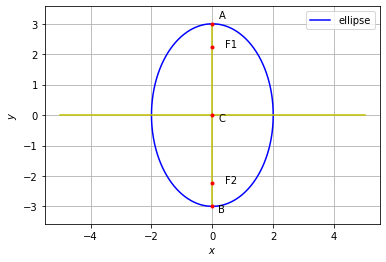

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

#setting up plot
fig = plt.figure()
ax = fig.add_subplot(111)
len = 500
y = np.linspace(-3,3,len)

#Generate line points
def line_gen(A,B):
  len =10
  x_AB = np.zeros((2,len))
  lam_1 = np.linspace(0,1,len)
  for i in range(len):
    temp1 = A + lam_1[i]*(B-A)
    x_AB[:,i]= temp1.T
  return x_AB


#ELLIPSE parameters
V = np.array(([0.04,0],[0,0.1]))
f = -1
u = np.array(([0,0]))
Vinv = LA.inv(V)

#Eigenvalues and eigenvectors
D_vec,P = LA.eig(V)
D = np.diag(D_vec)
uconst = u.T@Vinv@u-f
a = np.sqrt(np.abs(uconst/D_vec[1]))
b = np.sqrt(np.abs(uconst/D_vec[0]))

def ellipse_gen(y):
	x = 2*np.sqrt(1-(y**2/9))
	return x

#Affine Parameters
c = -Vinv@u
R =  np.array(([2,0],[0,3]))
ParamMatrix = np.array(([b,0],[0,a]))


#Generating the ellipse
x = ellipse_gen(y)
xStandardLeft = np.vstack((-x,y))
xStandardRight = np.vstack((x,y))

#Plotting points
A = np.array([0,3])
B = np.array([0,-3])
C = np.array([5,0])
D = np.array([-5,0])
f_1 = np.array([4,0])
f_2 = np.array([-4,0])

#Plotting the standard hyperbola
plt.plot(xStandardLeft[0,:],xStandardLeft[1,:],label='ellipse',color='b')
plt.plot(xStandardRight[0,:],xStandardRight[1,:],color='b')

#Plotting the major and minor axis of the ellipse
x_AB = line_gen(A,B)
plt.plot(x_AB[0,:],x_AB[1,:],color='y')
x_CD = line_gen(C,D)
plt.plot(x_CD[0,:],x_CD[1,:],color='y')

plt.plot(0,0, 'o',color='r',markersize=3)
plt.text(0.2 ,-0.2,'C')
plt.plot(0,3, 'o',color='r',markersize=3)
plt.text(0.2,3.2,'A')
plt.plot(0,-3, 'o',color='r',markersize=3)
plt.text(0.2 ,-3.2,'B')
plt.plot(0,2.236, 'o',color='r',markersize=3)
plt.text(0.4 ,2.236,'F1')
plt.plot(0,-2.236, 'o',color='r',markersize=3)
plt.text(0.4 ,-2.236,'F2')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid() # minor
plt.axis('equal')
plt.show()